In [ ]:
from utils import *
import os
import torchvision
import torch
from dataset_operations import detect_on_roi,count_preds_on_roi
import random
tile_size = 512

parent_dir = "rois2/"
img_dir = parent_dir + "images/"
tile_dir = parent_dir + "tiles/"
model_dir = parent_dir + "models/"

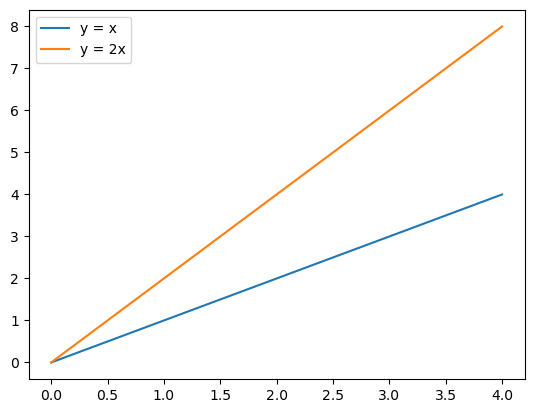

In [2]:
import matplotlib.pyplot as plt

x = [0,1,2,3,4]
y1 = [0,1,2,3,4]
y2 = [0,2,4,6,8]

plt.plot(x, y1, label='y = x')
plt.plot(x, y2, label='y = 2x')
plt.legend()
plt.show()

In [ ]:
roi_fps = os.listdir(img_dir)
test_roi_fps_doc = open(img_dir + 'test_rois.txt', 'r')
with open(img_dir + 'val_rois.txt', 'r') as f:
    lines = f.readlines()
line = lines[random.randint(0, len(lines) - 1)]
roi_fp = line.strip()

print('roi: ', roi_fp)

In [ ]:
model0 = torchvision.models.detection.ssdlite320_mobilenet_v3_large(num_classes=2).to('cuda')
model0.load_state_dict(torch.load('rois2/models/round1_model_epoch10.pth'))

total_preds0 = count_preds_on_roi(model0, roi_fp,512,256,[114,114,114],0.5,0.5)
print('round 1 model, nms_thr = 0.5, score_thr = 0.5, total preds: ', total_preds0)

In [ ]:
model0 = torchvision.models.detection.ssdlite320_mobilenet_v3_large(num_classes=2).to('cuda')
model0.load_state_dict(torch.load('rois2/models/round1_model_epoch50.pth'))

total_preds0 = count_preds_on_roi(model0, roi_fp,512,256,[114,114,114],0.5,0.5)
print('round 1 model, nms_thr = 0.5, score_thr = 0.5, total preds: ', total_preds0)

In [ ]:
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(num_classes=2).to('cuda')
model.load_state_dict(torch.load('rois2/models/round2_model_epoch6.pth'))

total_preds1 = count_preds_on_roi(model, roi_fp,512,256,[114,114,114],0.5,0.5)
print('round 2.1 model, nms_thr = 0.5, score_thr = 0.5, total preds: ', total_preds1)

In [ ]:
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(num_classes=2).to('cuda')
model.load_state_dict(torch.load('rois2/models/round2_model_epoch6.pth'))

total_preds1 = count_preds_on_roi(model, roi_fp,512,256,[114,114,114],0.1,0.5)
print('round 2.2 model, nms_thr = 0.5, score_thr = 0.5, total preds: ', total_preds1)

In [ ]:
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(num_classes=2).to('cuda')
model.load_state_dict(torch.load('rois2/models/round2_model_epoch1.pth'))

total_preds1 = count_preds_on_roi(model, roi_fp,512,256,[114,114,114],0.5,0.5)
print('round 2.2 model, nms_thr = 0.5, score_thr = 0.5, total preds: ', total_preds1)

In [ ]:
total_preds2 = count_preds_on_roi(model, roi_fp,512,256,[114,114,114],0.1,0.5)

print('round 2 model, nms_thr = 0.1, score_thr = 0.5, total preds: ', total_preds2)

In [ ]:
temp_dir = 'temp1/'
model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(num_classes=2).to('cuda')
model.load_state_dict(torch.load('rois2/models/round2_model_epoch6.pth'))
roi_fp = img_dir + 'expert1_id-6381471f7f8a5e686a52765f_left-36627_top-47431_right-39464_bottom-52356.png'
true_preds, total_true,total_negative_preds = detect_on_roi(model, roi_fp=roi_fp, window_size = 512, stride=256, nms_thr=0.1, iou_thr=0.5, score_thr=0.5, 
                                                            false_negative=False ,false_neg_label_dir=temp_dir, 
                                                            false_positive=True, false_pos_label_dir=temp_dir,
                                                            plot=False)
print('model of round2: ')
print('nms thr = 0.5, recall = ', true_preds,'/',total_true, ' = ', true_preds/total_true)
print('total negative preds: ', total_negative_preds)